## Exploring California Housing prices

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
housing_data = pd.read_csv('datasets/housing.csv')

In [4]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4986,-118.30,34.00,52.0,1718.0,354.0,1026.0,312.0,2.0000,128000.0,<1H OCEAN
7061,-118.02,33.93,35.0,2400.0,398.0,1218.0,408.0,4.1312,193800.0,<1H OCEAN
14919,-117.03,32.61,22.0,1028.0,148.0,523.0,152.0,6.0086,166900.0,NEAR OCEAN
10758,-117.86,33.65,4.0,3618.0,767.0,1326.0,714.0,5.4284,500001.0,<1H OCEAN
12304,-116.80,33.80,35.0,324.0,63.0,158.0,39.0,3.4167,100000.0,INLAND


In [8]:
housing_data.shape

(20640, 10)

In [10]:
housing_data = housing_data.dropna()

In [11]:
housing_data.shape

(20433, 10)

In [12]:
housing_data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

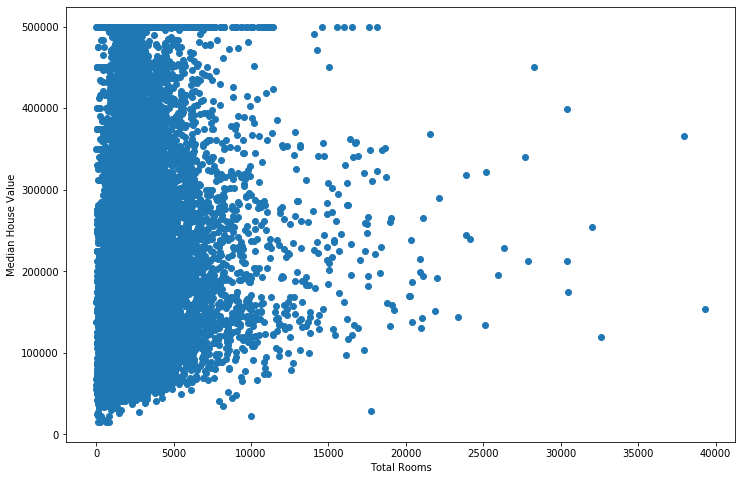

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(housing_data['total_rooms'], housing_data['median_house_value'])
plt.xlabel("Total Rooms")
plt.ylabel("Median House Value")

Text(0, 0.5, 'Median House Value')

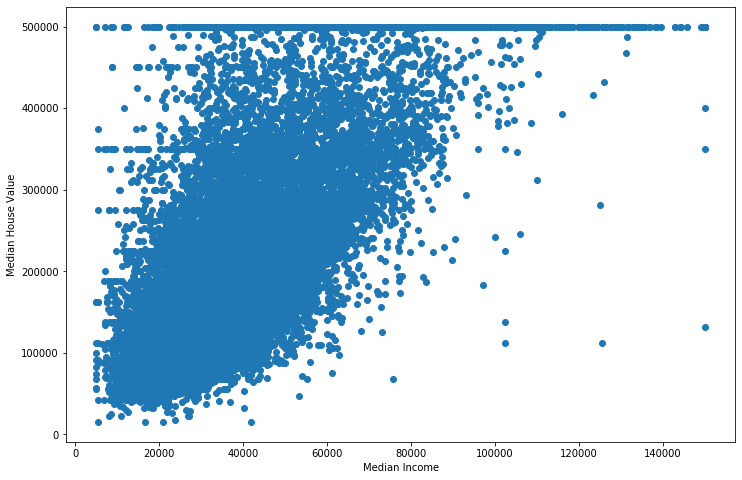

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(housing_data['median_income'] * 10000, housing_data['median_house_value'])
plt.xlabel("Median Income")
plt.ylabel("Median House Value")

In [18]:
housing_data_cor = housing_data.corr()
housing_data_cor

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


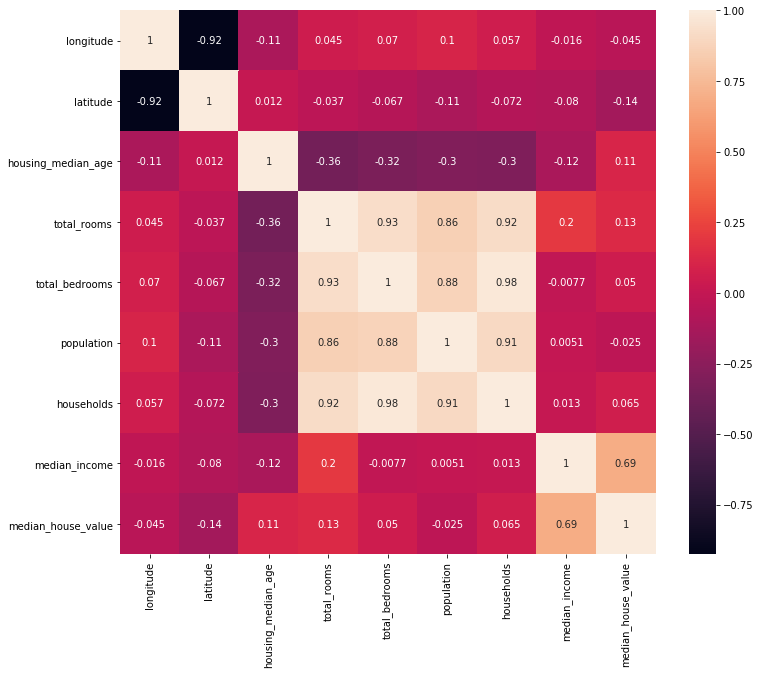

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(housing_data_cor, annot=True)

## Predicting California House with Linear Regression

In [22]:
# visualize the number of points clustered around houses with price 500001
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [23]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [25]:
housing_data.shape

(19475, 10)

In [26]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [27]:
# applying one-hot encoding to convert string  field to numeric value
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [28]:
housing_data.shape

(19475, 14)

In [29]:
# view a sample of the data
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
19928,-119.32,36.32,29.0,2409.0,436.0,1142.0,440.0,3.6895,87700.0,0,1,0,0,0
16425,-121.47,38.13,13.0,3192.0,715.0,1768.0,626.0,2.2619,123500.0,0,1,0,0,0
2279,-119.78,36.78,31.0,2164.0,456.0,959.0,463.0,2.3293,73400.0,0,1,0,0,0
11931,-117.39,33.95,35.0,3306.0,680.0,1742.0,673.0,3.7109,109100.0,0,1,0,0,0
9177,-118.52,34.40,5.0,7748.0,1557.0,4768.0,1393.0,5.3050,311200.0,1,0,0,0,0


In [30]:
# set features for target model
X = housing_data.drop('median_house_value', axis=1)  # training data
Y = housing_data['median_house_value']  # prediction data

In [57]:
# split dataset into training and test data
# x_train contains features of training data,and y_train will contain the corresponding target(prediction)
# x_test contains all the records for the test data, y_test contains the actual target for the test data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [58]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [59]:

# normalization scales numeric values between 0 and 1 to improve model performance
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)  

In [60]:
# evaluate the training score
print(f'Training score: {linear_model.score(x_train, y_train)}')

Training score: 0.6152875900074004


In [61]:
predictors = x_train.columns  # train features
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [62]:
# viisualize features coefficients
coef = pd.Series(linear_model.coef_, predictors).sort_values()

In [63]:
print(coef)

ocean_proximity_INLAND        -26066.069366
longitude                     -24430.757472
latitude                      -22204.988792
population                       -29.162270
total_rooms                       -6.759474
households                        36.600866
total_bedrooms                    94.074413
housing_median_age               957.203992
ocean_proximity_NEAR BAY        6003.030062
ocean_proximity_<1H OCEAN      13443.753857
ocean_proximity_NEAR OCEAN     17522.272725
median_income                  38537.823178
ocean_proximity_ISLAND        154190.935527
dtype: float64


In [64]:
# make prediction on the test data
y_pred = linear_model.predict(x_test)

In [65]:
# compare predicted with actual datasets
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
8967,282610.881389,336000.0
2111,76229.183600,58700.0
12628,76235.464822,70300.0
11662,270047.859055,220700.0
5571,242477.963491,238700.0
6812,204653.887920,212000.0
6425,154712.699112,158100.0
3170,102205.032396,75000.0
9580,77073.556976,95800.0
1886,63733.854458,90400.0


In [66]:
# validate training score
from sklearn.metrics import r2_score

print(f'Testing Score: {r2_score(y_test, y_pred)}')

Testing Score: 0.6029948941192158


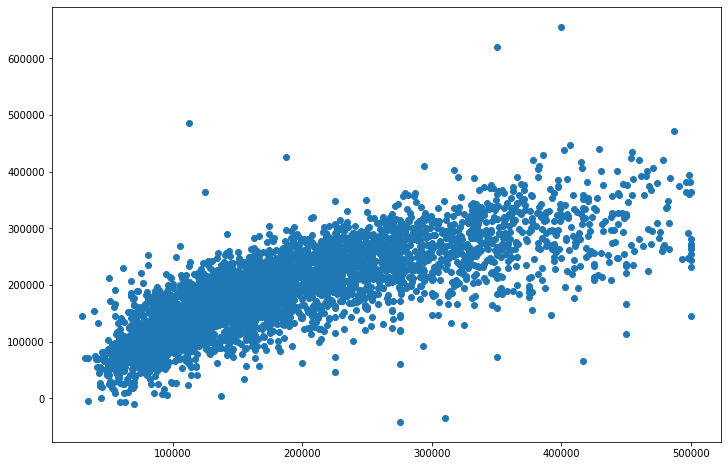

In [68]:
# visualize predicted prices against actual values with scatter plot

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.show()

In [70]:
# sample prediction
df_pred_actual_sample = df_pred_actual.sample(100).reset_index()

In [71]:
df_pred_actual_sample.head()

,index,predicted,actual
0,20251,257183.324659,218800.0
1,5716,209256.202129,306300.0
2,2899,78163.030800,47500.0
3,7552,174545.128845,128100.0
4,8641,313369.817205,394600.0


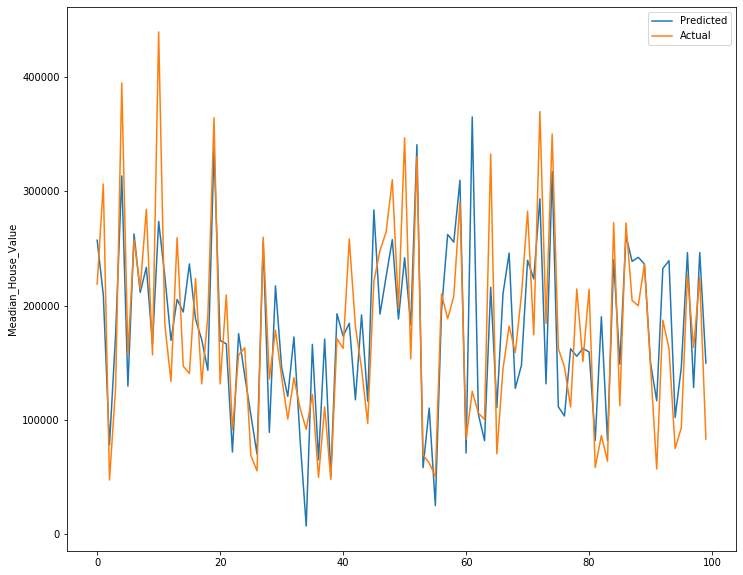

In [74]:
# visualize sample
plt.figure(figsize=(12,10))
plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('Meadian_House_Value')
plt.legend()
plt.show()